In [ ]:
# Climate Action Data Analysis and Cleaning
# Objectives
# 1. Load the dataset 'climate_action_data.csv' into a Pandas DataFrame.
# 2. Inspect the dataset for structure, data types, missing values, duplicates, and erroneous entries.
# 3. Clean the dataset by:
#    - Removing duplicate records.
#    - Replacing erroneous values (e.g., 'error') with NaN.
#    - Handling missing values logically (e.g., filling with mean/median or dropping if necessary).
# 4. Convert columns to correct data types for accurate analysis.
# 5. Generate descriptive statistics to understand the central tendency and spread of numeric variables.
# 6. Visualize distributions using histograms for key features like temperature, soil moisture, and pH.
# 7. Create a correlation heatmap to identify relationships between environmental variables.
# 8. Identify features that most influence fertilizer recommendations/
# 9. Determine the crop type with the highest average soil moisture.
# 10. Suggest irrigation adjustments for crops with average temperatures above 30°C.
# 11. Save the cleaned dataset as 'cleaned_precision_agriculture_data.csv' for future use.



In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import seaborn as sns
from datetime import datetime

In [ ]:
# Your task is to load this dataset into a Pandas DataFrame\
    # and conduct a thorough data inspection to identify the structure, missing values, and data types

In [51]:
# Load the dataset
df = pd.read_csv('climate_action_data.csv')
# Inspect the dataset
print("Dataset Structure:")
print(df.info())
print("Dataframe shape:", df.shape)


Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB
None
Dataframe shape: (913, 10)


In [9]:
df.head()  # Display the first few rows of the DataFrame

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [7]:
df.describe()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1779,2026-01-02,error,7.54,19.1,56.0,Wheat,66.9,8.0,IMG-2779
freq,2,2,5,11,13,8,203,8,11,2


In [5]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [8]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

Number of duplicate records: 111


In [10]:
# Copy the DataFrame for cleaning
clean_df = df.copy()

In [ ]:
# Clean the dataset by removing duplicate records, replacing erroneous values with NaN,
# and handling missing data appropriately by either filling or dropping values based on logical reasoning.

In [15]:
# Handling missing values
# Handle the date missing values by filling with the forward fill method which propagates the last valid observation forward
clean_df['Date'] = pd.to_datetime(clean_df['Date'], errors='coerce')
clean_df['Date'].fillna(method='ffill', inplace=True)  # type: ignore

# Check for missing values
print("Missing Values:")
print(clean_df.isnull().sum())



Missing Values:
Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_16420\3826220599.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_df['Date'].fillna(method='ffill', inplace=True)  # type: ignore
C:\Users\user\AppData\Local\Temp\ipykernel_16420\3826220599.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  clean_df['Date'].fillna(method='ffill', inplace=True)  # type: ignore


In [17]:
# Handle the crop type missing values by filling with the mode (most common value)
clean_df['Crop_Type'].fillna(clean_df['Crop_Type'].mode()[0], inplace=True)

# Check for missing values again
print("Missing Values after filling:")
print(clean_df.isnull().sum())

Missing Values after filling:
Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_16420\3976665236.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_df['Crop_Type'].fillna(clean_df['Crop_Type'].mode()[0], inplace=True)


In [18]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      913 non-null    object        
 1   Date                           913 non-null    datetime64[ns]
 2   Soil_Moisture(%)               913 non-null    object        
 3   Soil_pH                        913 non-null    object        
 4   Temperature(C)                 913 non-null    object        
 5   Humidity(%)                    913 non-null    object        
 6   Crop_Type                      913 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object        
 8   Irrigation_Recommended(mm)     913 non-null    object        
 9   Drone_Image_ID                 913 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 71.5+ KB


In [20]:
# Convert numerical columns to appropriate data types
cols_to_convert = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)',
                   'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']

for col in cols_to_convert:
    clean_df[col] = pd.to_numeric(clean_df[col], errors='coerce')

# Check the data types after conversion
print("Data Types after Conversion:")
print(clean_df.dtypes)


Data Types after Conversion:
Sensor_ID                                object
Date                             datetime64[ns]
Soil_Moisture(%)                        float64
Soil_pH                                 float64
Temperature(C)                          float64
Humidity(%)                             float64
Crop_Type                                object
Fertilizer_Recommended(kg/ha)           float64
Irrigation_Recommended(mm)              float64
Drone_Image_ID                           object
dtype: object


In [21]:
# Check for NaN values after conversion
print("NaN Values after Conversion:")   
clean_df.isna().sum()


NaN Values after Conversion:


Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 5
Soil_pH                          5
Temperature(C)                   5
Humidity(%)                      5
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    5
Irrigation_Recommended(mm)       5
Drone_Image_ID                   0
dtype: int64

In [22]:
clean_df.describe()

,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm)
count,913,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2026-02-05 00:56:46.790799360,44.470099,6.255639,26.404515,60.095374,87.659692,17.415419
min,2025-01-01 00:00:00,10.350000,4.520000,18.000000,30.000000,30.000000,5.000000
25%,2025-07-20 00:00:00,26.520000,5.330000,22.100000,45.900000,58.275000,11.400000
50%,2026-02-04 00:00:00,45.185000,6.295000,26.600000,59.400000,86.300000,17.400000
75%,2026-08-27 00:00:00,62.420000,7.105000,30.600000,75.325000,117.625000,23.700000
max,2027-03-11 00:00:00,79.980000,8.000000,35.000000,89.900000,149.700000,29.900000
std,NaN,20.626613,1.026400,4.931119,17.561515,34.704878,7.105890


In [24]:
# Handle NaN values in numerical columns
for col in cols_to_convert:
    if clean_df[col].isnull().any():
        # Fill NaN values with the mean of the column
        clean_df[col].fillna(clean_df[col].mean(), inplace=True)
        
# Check for NaN values again
print("NaN Values after Filling with Mean:")
print(clean_df.isna().sum())

NaN Values after Filling with Mean:
Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [25]:
#Handle the wrong values ie outliers in the dataset using the 3-sigma rule
for col in cols_to_convert:
    mean = clean_df[col].mean()
    std_dev = clean_df[col].std()
    # Define the upper and lower bounds
    upper_bound = mean + (3 * std_dev)
    lower_bound = mean - (3 * std_dev)
    # Replace outliers with median 
    clean_df[col] = np.where((clean_df[col] > upper_bound) | (clean_df[col] < lower_bound),
                              clean_df[col].median(), clean_df[col])

In [26]:
# Check for duplicates again
duplicates_after_cleaning = clean_df.duplicated().sum()
print(f"Number of duplicate records after cleaning: {duplicates_after_cleaning}")

Number of duplicate records after cleaning: 111


In [29]:
# Drop duplicates
if duplicates_after_cleaning > 0:
    clean_df.drop_duplicates(inplace=True)

# Check for duplicates after dropping
duplicates_after_dropping = clean_df.duplicated().sum()
print(f"Number of duplicate records after dropping: {duplicates_after_dropping}")

clean_df.shape
clean_df.info()

Number of duplicate records after dropping: 0
<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      802 non-null    object        
 1   Date                           802 non-null    datetime64[ns]
 2   Soil_Moisture(%)               802 non-null    float64       
 3   Soil_pH                        802 non-null    float64       
 4   Temperature(C)                 802 non-null    float64       
 5   Humidity(%)                    802 non-null    float64       
 6   Crop_Type                      802 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  802 non-null    float64       
 8   Irrigation_Recommended(mm)     802 non-null    float64       
 9   Drone_Image_ID                 802 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
m

In [30]:
# Generate descriptive statistics to understand the central tendency and spread of numeric variables
print("Descriptive Statistics:")
print(clean_df.describe())

Descriptive Statistics:
                                Date  Soil_Moisture(%)     Soil_pH  \
count                            802        802.000000  802.000000   
mean   2026-02-04 01:40:32.917705728         44.761896    6.248838   
min              2025-01-01 00:00:00         10.350000    4.520000   
25%              2025-07-19 06:00:00         26.947500    5.330000   
50%              2026-02-04 12:00:00         45.230000    6.255639   
75%              2026-08-22 18:00:00         62.555000    7.080000   
max              2027-03-11 00:00:00         79.980000    8.000000   
std                              NaN         20.460681    1.021572   

       Temperature(C)  Humidity(%)  Fertilizer_Recommended(kg/ha)  \
count      802.000000   802.000000                     802.000000   
mean        26.460253    60.037627                      87.469200   
min         18.000000    30.000000                      30.000000   
25%         22.300000    46.025000                      57.925000   


In [37]:
# Unique crop types
unique_crop_types = clean_df['Crop_Type'].unique()
print("Unique Crop Types:")
print(unique_crop_types)

Unique Crop Types:
['Tomatoes' 'Wheat' 'Maize' 'Beans' 'Lettuce']


In [ ]:
# Histogram of duration
plt.figure(figsize=(15, 10)) #

plt.subplot(2, 2, 1)
sns.histplot(df["Duration"], kde=True, bins=30)
plt.title("Duration Distribution")

plt.subplot(2, 2, 2)
sns.histplot(df["Pulse"], kde=True, bins=30)
plt.title("Pulse Distribution")

Text(0.5, 1.0, 'Temperature Distribution')

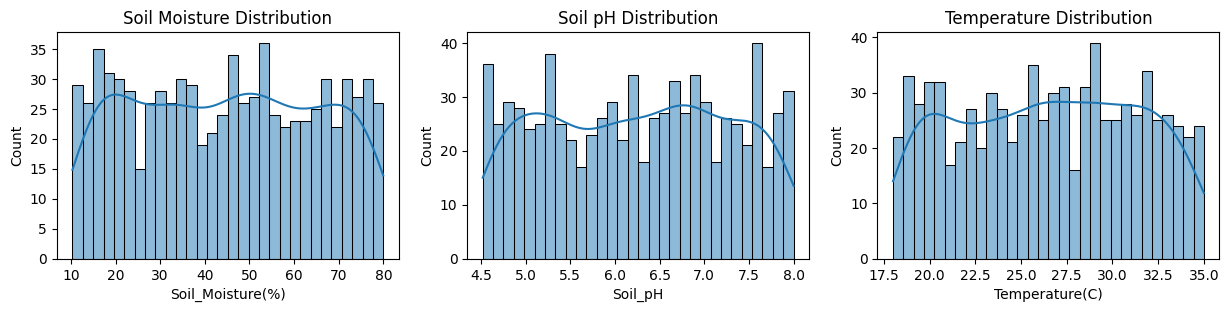

In [ ]:
# Visualize distributions using histograms for key features
plt.figure(figsize=(15, 10)) #This will create a figure with a size of 15 inches by 10 inches

plt.subplot(3, 3, 1) #this will create a subplot in a 2x2 grid, and this is the first subplot
sns.histplot(clean_df['Soil_Moisture(%)'], kde=True, bins=30)
plt.title('Soil Moisture Distribution')

plt.subplot(3, 3, 2)  # This is the second subplot
sns.histplot(clean_df['Soil_pH'], kde=True, bins=30)
plt.title('Soil pH Distribution')

plt.subplot(3, 3, 3)  # This is the third subplot
sns.histplot(clean_df['Temperature(C)'], kde=True, bins=30)
plt.title('Temperature Distribution')



Text(0.5, 1.0, 'Irrigation Recommended Distribution')

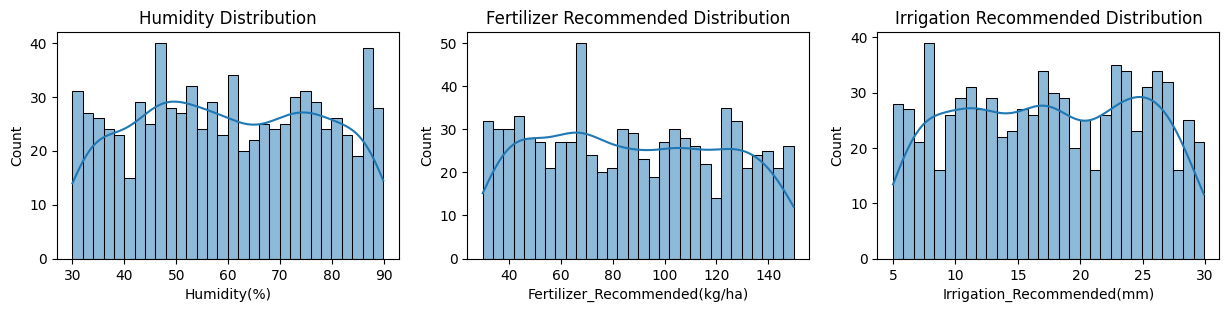

In [33]:
# Remaining subplots for Humidity, Fertilizer Recommended, and Irrigation Recommended
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1) 
sns.histplot(clean_df['Humidity(%)'], kde=True, bins=30)
plt.title('Humidity Distribution')

plt.subplot(3, 3, 2)
sns.histplot(clean_df['Fertilizer_Recommended(kg/ha)'], kde=True, bins=30)
plt.title('Fertilizer Recommended Distribution')

plt.subplot(3, 3, 3)
sns.histplot(clean_df['Irrigation_Recommended(mm)'], kde=True, bins=30)
plt.title('Irrigation Recommended Distribution')


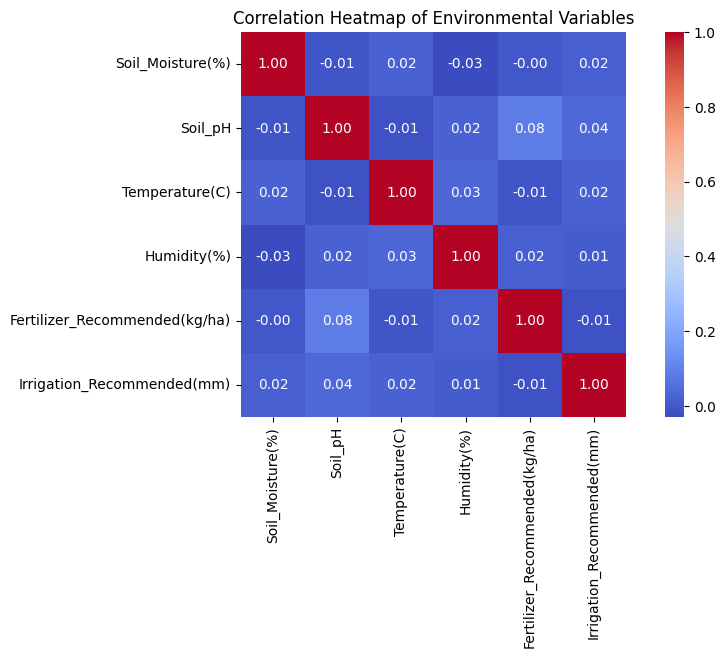

In [36]:
# Correlation heatmap to identify relationships between soil and environmental variables
plt.figure(figsize=(10, 5))
correlation_matrix = clean_df[cols_to_convert].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Environmental Variables')
plt.show()


In [38]:
correlations = clean_df.corr(numeric_only=True)
fertilizer_corr = correlations['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)
print(fertilizer_corr)


Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.083676
Humidity(%)                      0.015300
Soil_Moisture(%)                -0.002758
Temperature(C)                  -0.007207
Irrigation_Recommended(mm)      -0.014122
Name: Fertilizer_Recommended(kg/ha), dtype: float64


In [54]:
# Crop type with the highest average soil moisture
highest_avg_soil_moisture = clean_df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().idxmax()
print(f"Crop Type with Highest Average Soil Moisture: {highest_avg_soil_moisture}")
print(f"highest average temperature: {clean_df['Temperature(C)'].mean()}°C")

Crop Type with Highest Average Soil Moisture: Wheat
highest average temperature: 26.460252589890914°C


C:\Users\user\AppData\Local\Temp\ipykernel_16420\3872761849.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


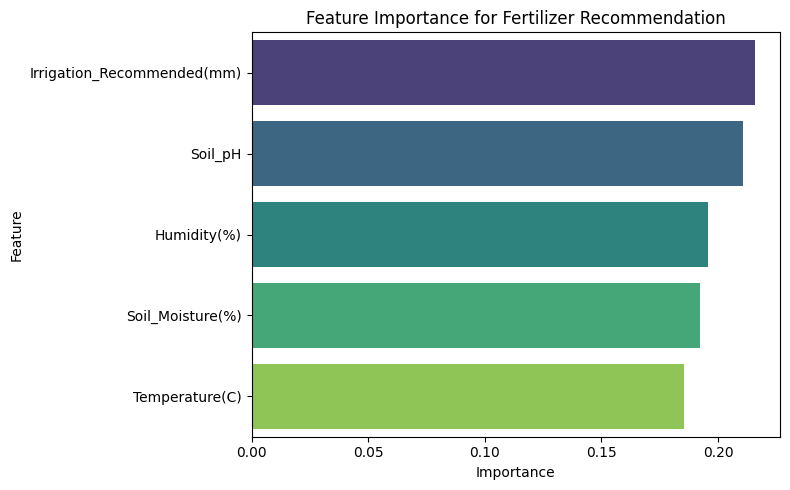

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


# 1. Select features and target
features = ['Soil_pH', 'Humidity(%)', 'Soil_Moisture(%)', 'Temperature(C)', 'Irrigation_Recommended(mm)']
target = 'Fertilizer_Recommended(kg/ha)'

X = clean_df[features]
y = clean_df[target]

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Get feature importances
importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 5. Visualize
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance for Fertilizer Recommendation')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [44]:
# Determine irrigation adjustments for crops with average temperatures above 30°C
high_temp_crops = clean_df[clean_df['Temperature(C)'] > 30]
# List of crops with average temperatures above 30°C
high_temp_crops_list = high_temp_crops['Crop_Type'].unique()
print("Crops with Average Temperatures Above 30°C:")
print(high_temp_crops_list)


Crops with Average Temperatures Above 30°C:
['Lettuce' 'Maize' 'Wheat' 'Tomatoes' 'Beans']


In [55]:
# Calculate average temperature by crop type
crop_avg_temps = clean_df.groupby('Crop_Type')['Temperature(C)'].mean()

# Get crops with average temperature above 30°C
high_temp_crops_list = crop_avg_temps[crop_avg_temps > 30].index.tolist()

#print crop and average temp
print("Crops and their Average Temperatures:")
print(crop_avg_temps)


print("Crops with Average Temperatures Above 30°C:")
print(high_temp_crops_list)

Crops and their Average Temperatures:
Crop_Type
Beans       26.854635
Lettuce     26.160957
Maize       27.009061
Tomatoes    26.169670
Wheat       26.170480
Name: Temperature(C), dtype: float64
Crops with Average Temperatures Above 30°C:
[]


In [45]:
# Determine irrigation adjustments for crops with average temperatures above 30°C
high_temp_crops = clean_df[clean_df['Temperature(C)'] > 30]
if not high_temp_crops.empty:
    avg_irrigation = high_temp_crops['Irrigation_Recommended(mm)'].mean()
    print(f"Average Irrigation Recommended for Crops with Temperature > 30°C: {avg_irrigation:.2f} mm")

Average Irrigation Recommended for Crops with Temperature > 30°C: 17.65 mm


In [ ]:
# Insights and recommendations
# Key insights include:
# INSIGHT:
# - The crop type with the highest average soil moisture is wheat.

# INSIGHT:
# The top 3 factors influencing fertilizer recommendations are:
# 1. Irrigation_Recommended (most important)
# 2. Soil_pH
# 3. Humidity

# Temperature and Soil Moisture had relatively lower influence.

# INSIGHT:
# Crops with temperatures which go above 30°C include 'Lettuce' 'Maize' 'Wheat' 'Tomatoes' 'Beans', which may require irrigation adjustments.
# There are not any crops with average temperatures above 30°C in the dataset.
# The highest average temperature is 26.460252589890914°C


# Recommendations:
# - For crops with high soil moisture, consider reducing irrigation to prevent waterlogging.
# - For crops with high temperatures, increase irrigation to maintain optimal growth conditions.
# - Average Irrigation Recommended for Crops with Temperature > 30°C is 17.65 mm
